In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import data into dataframe
raw_data = pd.read_csv('gender-classifier-DFE-791531.csv', encoding='ISO-8859-1')

# rename column for greater simplicity
raw_data.rename({'_unit_id':'unit_id'}, axis=1, inplace=True)

# replace unit_id as index 
raw_data.set_index('unit_id', inplace=True)

# store original record count for later
orig_count = raw_data.shape[0]

# Initial Data

In [3]:
raw_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


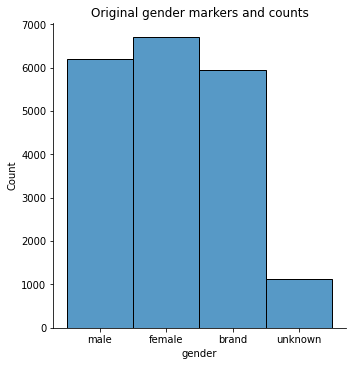

In [4]:
# distribution of values for gender

sns.displot(data=raw_data, x='gender').set(title='Original gender markers and counts');

# Cleaning the Data

In [5]:
# make gen_data df 
# drop records that have 'unknown', 'brand', and nan values for gender

gen_data = raw_data[raw_data['gender']!= 'unknown']
gen_data = gen_data[gen_data['gender']!= 'brand']
gen_data = gen_data[gen_data['gender'].notna()]

## New DataFrame with only Female and Male gender markers

In [6]:
gen_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


## Number of records before and after cleaning

In [7]:
print(f"Initial number of records: {orig_count}")
print(f"New number of records (only 'male' and 'female' gender markers): {gen_data['gender'].count()}")

Initial number of records: 20050
New number of records (only 'male' and 'female' gender markers): 12894


## Confirm we can index on unit_id (unique value for each row)

In [8]:
indx = gen_data.index
indx.is_unique

True

## Identify unique values per column

In [9]:
# determine if there are duplicate records that need to be dropped
# make a list of column names
col_lst = gen_data.columns.values.tolist()
cnt_lst = []

for col in col_lst:
    cnt_lst.append(len(gen_data[col].unique()))

# create df from these two lists
eda_df = pd.DataFrame(list(zip(col_lst, cnt_lst)),columns=['col_names','unique_counts']).set_index("col_names")

## Some of the fields we are interested and their corresponding number of unique values: 

In [10]:
eda_df.iloc[[4,5,9,13,18],:] # initial choices

,unique_counts
col_names,
gender,2
gender:confidence,791
description,10658
name,12310
text,12724


In [11]:
eda_df.iloc[[8,17,20,23],:] # possible additional analysis

,unique_counts
col_names,
created,12263
sidebar_color,419
tweet_count,9926
tweet_location,6067


# Exploratory Data Analysis

## Gender & Gender Confidence

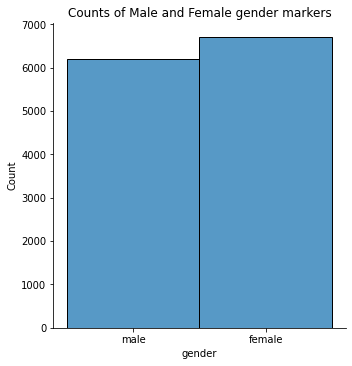

In [12]:
sns.displot(data=gen_data, x='gender')
plt.title("Counts of Male and Female gender markers");

#### Relatively similar number of records with M & F gender markers.

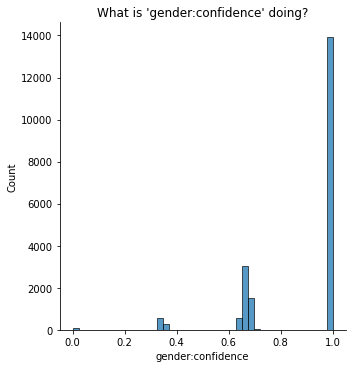

In [13]:
sns.displot(data=raw_data, x='gender:confidence')
plt.title("What is 'gender:confidence' doing?");

#### Confirmed as a confidence interval (0-1), and highest frequency is 1.0.

## Name 

In [14]:
gen_data["name"].head(20)

unit_id
815719226            sheezy0
815719227        DavdBurnett
815719228     lwtprettylaugh
815719229        douggarland
815719230       WilfordGemma
815719231      monroevicious
815719233         RobinMeske
815719234          pigzilla_
815719235      GabrieleNeher
815719238     kaylanabrewer_
815719240           cheyflan
815719241          Ayu7sith4
815719242       Toucaan_Samm
815719243         SSmyth2010
815719244    DarkToonsGaming
815719246          jlpeter37
815719247        SarahMaddry
815719248           bethleia
815719249        StrictlyAri
815719250           JHurkett
Name: name, dtype: object

## Description

In [23]:
pd.options.display.max_colwidth = 200 # adjust view to see complete text
gen_data["description"].head(20)

unit_id
815719226                                                                                                                                               i sing my own rhythm.
815719227                                                                                                      I'm the author of novels filled with family drama and romance.
815719228                                                                                                                                 louis whining and squealing and all
815719229                  Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.
815719230    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx
815719231                                                                                                                 

## Text

In [24]:
gen_data["text"].head(20)


unit_id
815719226                                  Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
815719227    ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
815719228                                                               i absolutely adore when louis starts the songs it hits me hard but it feels good
815719229     Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
815719230                                                Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx
815719231                                                              Ive seen people on the train with lamps, chairs, tvs etc  https://t.co/w6zf4pVM4I
815719233       Gala Bingo clubs bought for å£241m: The UK's largest High 